## 1- importer les bibliothéques

In [4]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.utils import resample
from keras.models import load_model
from scipy import stats
from matplotlib.ticker import MultipleLocator as Ml
from matplotlib.ticker import ScalarFormatter as SF


## 2- fixer les path des données

In [5]:
x_test_path='/kaggle/input/bootstrap-data/x_test(2).npy'
y_test_path='/kaggle/input/bootstrap-data/y_test(2).npy'
path_model="/kaggle/input/bootstrap-data/ModelSjogrenn(2).h5"

# importer le modéle

In [6]:
# Charger le modèle
model = load_model(path_model)
x_test=np.load(x_test_path)
y_test=np.load(y_test_path)

In [7]:
x_train,x_val,y_train,y_val=train_test_split(x_test,y_test,test_size=0.2,random_state=42)

In [8]:
import numpy as np
from sklearn.utils import resample


n_iterations =250
# Initialiser les listes pour stocker les mesures de performance
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
lrs_plus = []
lrs_moins = []

for _ in range(n_iterations):
    # Perform bootstrap resampling on the training data
    x_sample,y_sample = resample(x_train,y_train, n_samples=100, random_state=48)
    # Train the model on the bootstrap sample
    model.fit(x_sample,y_sample)
    #evaluer le modele 
    y_pred = model.predict(x_val)
    y_pred_classes = np.where(y_pred>0.5,1.,0)
    # calculer les métriques d'évaluation
    accuracy = accuracy_score(y_val, y_pred_classes)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred_classes, average='binary')
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred_classes).ravel()
    lr_plus= recall / (1 - tn / (tn + fp))
    lr_moins = (1 - recall) / (tn / (tn + fp))
    
    
    # Stocker les mesures de performance pour l'itération actuelle
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)
    lrs_plus.append(lr_plus)
    lrs_moins.append(lr_moins)

5/5 [==============================] - 0s 45ms/step


/tmp/ipykernel_31/722720264.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


5/5 [==============================] - 0s 45ms/step


/tmp/ipykernel_31/722720264.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  lr_plus= recall / (1 - tn / (tn + fp))


5/5 [==============================] - 0s 48ms/step


# Evalution

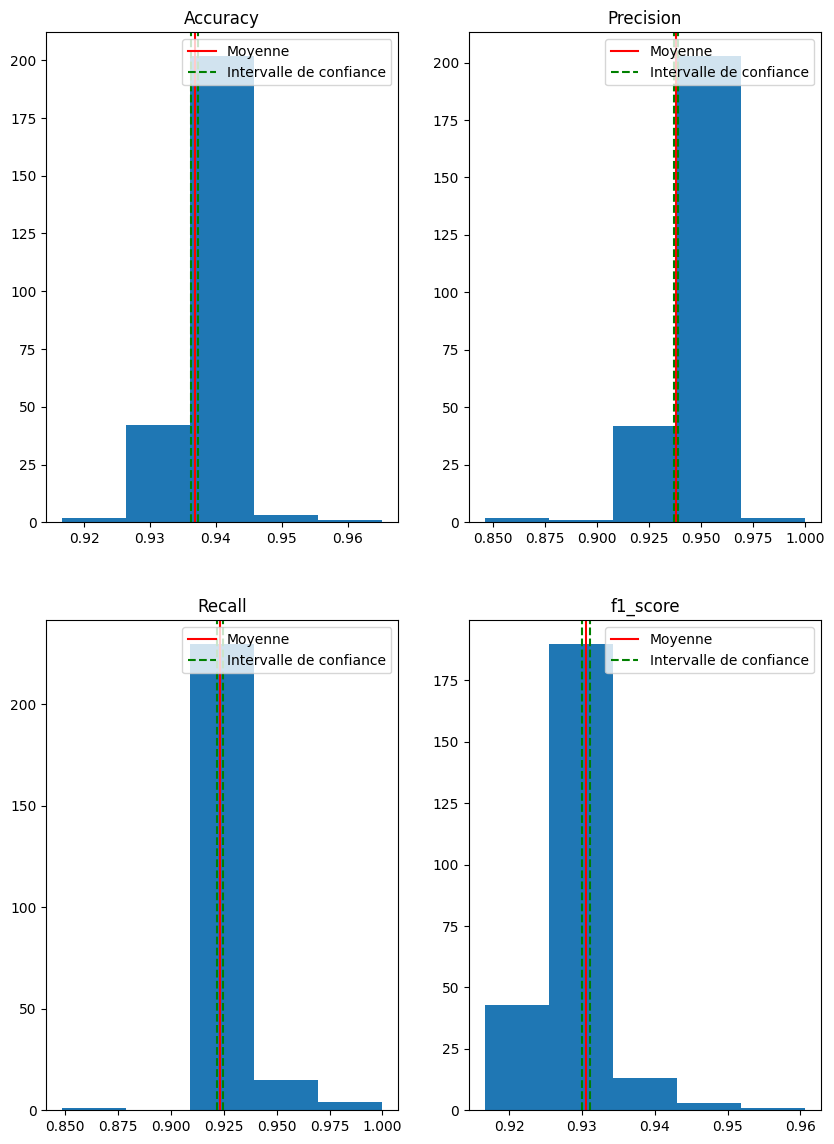

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,14))
axs = axs.ravel()

# métriques +scores
metrics = ['Accuracy','Precision','Recall','f1_score']
scores = [accuracy_scores, precision_scores, recall_scores,f1_scores]

for i in range(len(metrics)):
    # calculer l'intervalle de confiance à 95 % pour chaque métrique
    conf_interval = stats.t.interval(0.95, len(scores[i])-1, loc=np.mean(scores[i]), scale=stats.sem(scores[i]))
    
    # tracer l'histogramme avec l'intervalle de confiance
    axs[i].hist(scores[i], bins=5)
    axs[i].xaxis.set_minor_locator(Ml(0.1))
    axs[i].xaxis.set_minor_formatter(SF())
    # Définir l'échelle de l'axe des abscisses
    axs[i].axvline(np.mean(scores[i]), color='red', label='Moyenne')
    axs[i].axvline(conf_interval[0], color='green', linestyle='--', label='Intervalle de confiance')
    axs[i].axvline(conf_interval[1], color='green', linestyle='--')
    axs[i].set_title(metrics[i])
    axs[i].legend()

# afficher le graphique
plt.show()

In [10]:
print(np.mean(accuracy_scores))
print(np.mean( precision_scores))
print(np.mean(recall_scores))
print(np.mean(f1_scores))
print(np.mean(lrs_plus[6:] ))
print(np.mean(lrs_moins ))

0.9368333333333333
0.9379983565100152
0.9233939393939392
0.9305471732020765
17.980588673621444
0.08071864508138618
